In [1]:
#Data Preparation Libraries
import pandas as pd
import numpy as np
import datetime

#data Visualisation Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#machine Learning Libraries
mport random 

from fbprophet import Prophet
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Fknjoroge\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df=pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,619030,619031,619032,619033,619034,619035,619036,619037,619038,619039
date,2013-02-08,2013-02-11,2013-02-12,2013-02-13,2013-02-14,2013-02-15,2013-02-19,2013-02-20,2013-02-21,2013-02-22,...,2018-01-25,2018-01-26,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-05,2018-02-06,2018-02-07
open,15.07,14.89,14.45,14.3,14.94,13.93,14.33,14.17,13.62,13.57,...,78.47,79.49,79.81,78.44,78.49,76.84,77.53,76.64,72.74,72.7
high,15.12,15.01,14.51,14.94,14.96,14.61,14.56,14.26,13.95,13.6,...,79.38,80.13,79.95,78.69,78.77,78.27,78.12,76.92,74.56,75
low,14.63,14.26,14.1,14.25,13.16,13.93,14.08,13.15,12.9,13.21,...,78.345,79.38,79.11,77.91,76.54,76.69,76.73,73.18,72.13,72.69
close,14.75,14.46,14.27,14.66,13.99,14.5,14.26,13.33,13.37,13.57,...,79.25,80.09,79.18,78.35,76.73,77.82,76.78,73.83,73.27,73.86
volume,8407500,8882000,8126000,10259500,31879900,15628000,11354400,14725200,11922100,6071400,...,2327262,2532808,2662383,3808707,4136360,2982259,2595187,2962031,4924323,4534912
Name,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,...,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS,ZTS


In [4]:
df.shape

(619040, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
#Converting pickup_datetime and dropoff_datetime into proper data format
df['date']=pd.to_datetime(df['date'])

In [7]:
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [8]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [9]:
#FIlling Missing values
df['open'].fillna(df.open.mean(), inplace=True)
df['high'].fillna(df.high.mean(), inplace=True)
df['low'].fillna(df.low.mean(), inplace=True)

In [10]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
print(df.duplicated().sum())

0


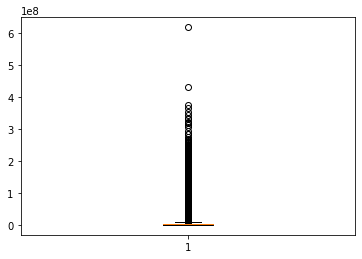

In [12]:
#Checking outliers
plt.boxplot(df["volume"])
plt.show()

In [13]:
#removing outliers
print(df['volume'].quantile(0.10))
print(df['volume'].quantile(0.90))

614901.9
8853663.599999998


In [14]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()

In [15]:
df.head()

,date,open,high,low,close,volume,Name,year,month,day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,February,Friday
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,February,Monday
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,February,Tuesday
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,February,Wednesday
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,February,Thursday


In [16]:
#How many months/years of data is provided?


In [17]:
df['year'].value_counts()

2017    126032
2016    125324
2015    123719
2014    122397
2013    108438
2018     13130
Name: year, dtype: int64

In [18]:
df['month'].value_counts()

October      54700
August       54186
March        52806
June         52492
December     52345
July         52125
May          51912
April        50861
September    50733
January      49950
November     49853
February     47077
Name: month, dtype: int64

In [19]:
#How many number of stocks?
df['Name'].nunique()

505

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,619040.0,8.302333e+01,9.737790e+01,1.62,40.220,62.59,9.437000e+01,2.044000e+03
high,619040.0,8.377831e+01,9.820688e+01,1.69,40.620,63.15,9.518000e+01,2.067990e+03
low,619040.0,8.225610e+01,9.650680e+01,1.50,39.830,62.02,9.353538e+01,2.035110e+03
close,619040.0,8.304376e+01,9.738975e+01,1.59,40.245,62.62,9.441000e+01,2.049000e+03
volume,619040.0,4.321823e+06,8.693610e+06,0.00,1070320.500,2082093.50,4.284509e+06,6.182376e+08
year,619040.0,2.015125e+03,1.445837e+00,2013.00,2014.000,2015.00,2.016000e+03,2.018000e+03


In [21]:
df.describe()

,open,high,low,close,volume,year
count,619040.000000,619040.000000,619040.000000,619040.000000,6.190400e+05,619040.000000
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06,2015.125202
std,97.377904,98.206884,96.506797,97.389748,8.693610e+06,1.445837
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00,2013.000000
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06,2014.000000
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06,2015.000000
75%,94.370000,95.180000,93.535375,94.410000,4.284509e+06,2016.000000
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,2018.000000


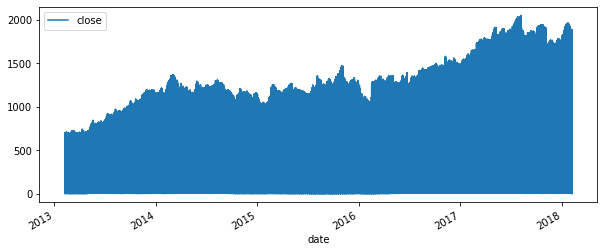

In [22]:
df.plot(x='date', y='close',legend=True,figsize=(10,4))
plt.ioff()

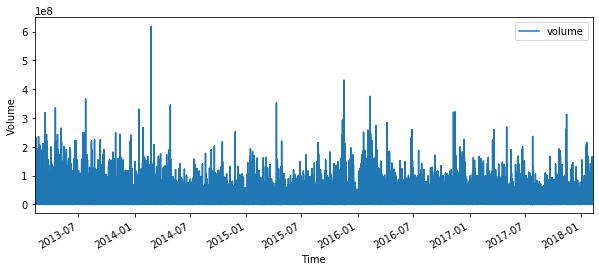

In [23]:
#Volume traded for Apple Stock

title='VOLUME TRADED'
ylabel='Volume'
xlabel='Time'

ax=df.plot(x='date', y='volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.ioff()

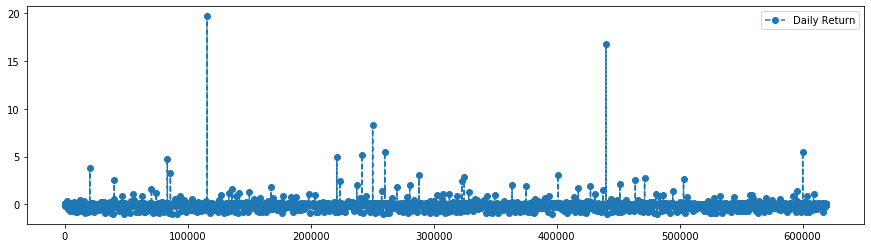

In [24]:
#Daily Returns

df['Daily Return']=df['close'].pct_change()
df['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

In [27]:
df_prophet=df[['date','close']]
df_prophet=df_prophet.sort_values('date')
df_prophet

,date,close
0,2013-02-08,14.75
508224,2013-02-08,81.89
506965,2013-02-08,79.07
85755,2013-02-08,238.16
505706,2013-02-08,89.16
...,...,...
147509,2018-02-07,52.97
31474,2018-02-07,106.63
241494,2018-02-07,10.76
42609,2018-02-07,177.47


In [28]:
#Renaiming the Column names to Suite Prophet Algorithm

df_prophet=df_prophet.rename(columns={'date':'ds','close':'y'})
df_prophet

,ds,y
0,2013-02-08,14.75
508224,2013-02-08,81.89
506965,2013-02-08,79.07
85755,2013-02-08,238.16
505706,2013-02-08,89.16
...,...,...
147509,2018-02-07,52.97
31474,2018-02-07,106.63
241494,2018-02-07,10.76
42609,2018-02-07,177.47


In [29]:
#conda install -c conda-forge fbprophet 

In [ ]:
import random 
import seaborn as sns
from fbprophet import Prophet
m=Prophet()
m.fit(df_prophet)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Fknjoroge\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
#Plotting the Forecast for Period of One years
figure=m.plot(forecast,xlabel='Date',ylabel='Closing Price')

In [ ]:
.EDA with python?
1.How many months/years of data is provided?
2.How many number of stocks?
3.Descriptive stats for each stock:
a.Overall max, min, avg, sd, variance, quantile across the time period
b.Day when it has reached the max
c.Overall max, min, avg, sd, variance, quantile across the time period on daily returns, for this do daily difference
d.Overall max, min, avg, sd, variance, quantile across the time period for number of shares sold
4.Visualization:
a.Time series plot for all the stocks
b.Time series plot for all the stocks on returns
c.Histogram plot for all the stocks, for this understand quantiles and do proper binning?
d.Histogram plot for all the stock returns, for this understand quantiles and do proper binning?
e.Time series plot for max, avg monthly for all stocks
Scatter plot for number of shares sold vs value for each stock?
Use some advanced packages to select the stock and visualize it.
5.Find the max value of each stock per month and year and pivot it
6.Find the avg value of each stock per year and pivot it
7.Do a bar plot to understand number of stocks with different average returns, average values
5.Repeat the same with power bi